# Лабораторная работа №4

Выполнил: Голубев Артём Дмитриевич   
Ису: 502712   
Группа: Р3124   

Сравните время работы двух реализаций функции вычисления факториала:

    рекурсивной,

    нерекурсивной (через цикл).

Для сравнения используйте модуль timeit, а для наглядности постройте график с помощью matplotlib, показывающий зависимость времени выполнения от входных данных.

Условия:

    Реализуйте две функции fact_recursive(n) и fact_iterative(n).

    Для корректного сравнения используйте одинаковый набор чисел для тестирования.

    Визуализируйте результаты (ось X — размер входного числа n, ось Y — время вычислений).

    Сравните эффективность двух подходов.


Требования:

    сгенерировать один фиксированный список чисел для всех прогонов и несколько раз запустить вычисления для усреднения.
    необходимо провести "чистый бенчмарк" одного вызова (для одного числа) / показать replit.

# Решение работы

**Импортируем используемые библиотеки**

In [2]:
import timeit
import matplotlib.pyplot as plt
from functools import lru_cache

**Измерение времени работы функци без мемоизации:**

n	r	iter	rec
10 	 5 	 0.001011 	 0.001606
60 	 5 	 0.006559 	 0.011064
110 	 5 	 0.016176 	 0.032484
160 	 5 	 0.022902 	 0.048118
210 	 5 	 0.033277 	 0.070481
260 	 5 	 0.04817 	 0.097325
310 	 5 	 0.061152 	 0.134303
360 	 5 	 0.077539 	 0.158447
410 	 5 	 0.107999 	 0.204187
460 	 5 	 0.121416 	 0.234761
510 	 5 	 0.137434 	 0.263975
560 	 5 	 0.182528 	 0.300291
610 	 5 	 0.207219 	 0.359314
660 	 5 	 0.268215 	 0.408203
710 	 5 	 0.283381 	 0.47511
760 	 5 	 0.321359 	 0.533649
810 	 5 	 0.351353 	 0.579395
860 	 5 	 0.41459 	 0.65391
910 	 5 	 0.42138 	 0.732505
960 	 5 	 0.512535 	 0.776519


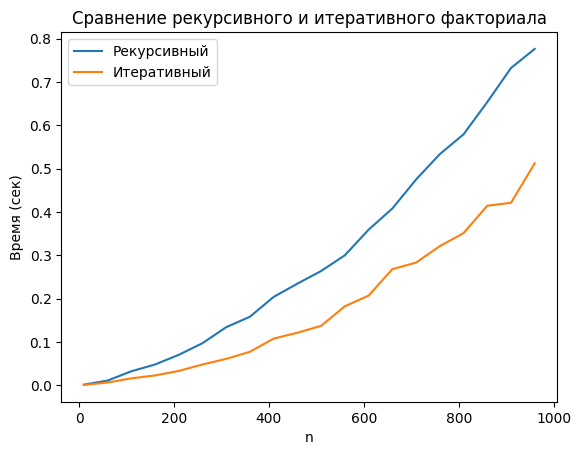

In [3]:
def fact_recursive(n: int) -> int:
    """Рекурсивный факториал"""
    if n == 0:
        return 1
    return n * fact_recursive(n - 1)


def fact_iterative(n: int) -> int:
    """Нерекурсивный факториал"""
    res = 1
    for i in range(1, n + 1):
        res *= i
    return res


def benchmark(func, n, number=1, repeat=5):
    """Возвращает среднее время выполнения func(n)"""
    times = timeit.repeat(lambda: func(n), number=number, repeat=repeat)
    return min(times)



def main():
    # фиксированный набор данных
    test_data = list(range(10, 1000, 50))

    res_recursive = []
    res_iterative = []

    for n in test_data:
      res_recursive.append(benchmark(fact_recursive, n, repeat=5, number=1000))
      res_iterative.append(benchmark(fact_iterative, n, repeat=5, number=1000))

    print('n\tr\titer\trec')
    for i in range(len(test_data)):
      print(test_data[i], '\t', '5', '\t', round(res_iterative[i], 6), '\t', round(res_recursive[i], 6))

    # Визуализация
    plt.plot(test_data, res_recursive, label="Рекурсивный")
    plt.plot(test_data, res_iterative, label="Итеративный")
    plt.xlabel("n")
    plt.ylabel("Время (сек)")
    plt.title("Сравнение рекурсивного и итеративного факториала")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()


**Измерение времени работы функций с мемоизацией** (кэшем)

Устанавливаем лимит рекурсии (для избежания ошибок)

In [4]:
from sys import setrecursionlimit

setrecursionlimit(1000000)

n	r	iter	rec
200 	 5 	 0.000315 	 0.000306
400 	 5 	 0.000227 	 0.000311
600 	 5 	 0.000215 	 0.000214
800 	 5 	 0.000222 	 0.000228
1000 	 5 	 0.00022 	 0.000226
1200 	 5 	 0.000212 	 0.000227
1400 	 5 	 0.000218 	 0.000223
1600 	 5 	 0.000219 	 0.000225
1800 	 5 	 0.000214 	 0.00022
2000 	 5 	 0.000212 	 0.000216
2200 	 5 	 0.000297 	 0.000322
2400 	 5 	 0.000219 	 0.00021
2600 	 5 	 0.000316 	 0.000227
2800 	 5 	 0.000222 	 0.000228
3000 	 5 	 0.000227 	 0.000227
3200 	 5 	 0.000334 	 0.000322
3400 	 5 	 0.000218 	 0.000228
3600 	 5 	 0.000245 	 0.000234
3800 	 5 	 0.000231 	 0.000349
4000 	 5 	 0.000208 	 0.000213
4200 	 5 	 0.000247 	 0.000237
4400 	 5 	 0.000223 	 0.000222
4600 	 5 	 0.000226 	 0.000241
4800 	 5 	 0.000225 	 0.000222
5000 	 5 	 0.00021 	 0.000226
5200 	 5 	 0.000222 	 0.00021
5400 	 5 	 0.000288 	 0.000226
5600 	 5 	 0.000263 	 0.000276
5800 	 5 	 0.000224 	 0.000213
6000 	 5 	 0.000224 	 0.000279
6200 	 5 	 0.000228 	 0.000226
6400 	 5 	 0.000278 	 0.000277
6600

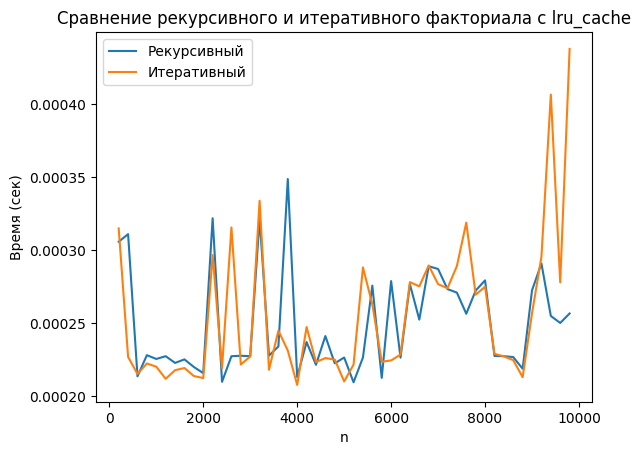

In [5]:
@lru_cache(None)
def fact_recursive_cache(n: int) -> int:
    """Рекурсивный факториал с lru_cache"""
    if n == 0:
        return 1
    return n * fact_recursive(n - 1)


@lru_cache(None)
def fact_iterative_cache(n: int) -> int:
    """Нерекурсивный факториал c lru_cache"""
    res = 1
    for i in range(1, n + 1):
        res *= i
    return res


def benchmark(func, n, number=1, repeat=5):
    """Возвращает среднее время выполнения func(n)"""
    times = timeit.repeat(lambda: func(n), number=number, repeat=repeat)
    return min(times)



def main():
    # фиксированный набор данных
    test_data = list(range(200, 10000, 200))

    res_recursive = []
    res_iterative = []

    for n in test_data:
      res_recursive.append(benchmark(fact_recursive_cache, n, repeat=5, number=1000))
      res_iterative.append(benchmark(fact_iterative_cache, n, repeat=5, number=1000))

    print('n\tr\titer\trec')
    for i in range(len(test_data)):
      print(test_data[i], '\t', '5', '\t', round(res_iterative[i], 6), '\t', round(res_recursive[i], 6))

    # Визуализация
    plt.plot(test_data, res_recursive, label="Рекурсивный")
    plt.plot(test_data, res_iterative, label="Итеративный")
    plt.xlabel("n")
    plt.ylabel("Время (сек)")
    plt.title("Сравнение рекурсивного и итеративного факториала с lru_cache")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()


# Сравнение времени работ функций с кэшем и без

**Сравнение итеративной функции** (с кэшем и без)



n	r	iter	iter w cache	w/wo
10 	 5 	 0.000983 	 0.000222 	 4
20 	 5 	 0.002028 	 0.000219 	 9
30 	 5 	 0.002915 	 0.00025 	 12
40 	 5 	 0.006141 	 0.000409 	 15
50 	 5 	 0.005254 	 0.000219 	 24
60 	 5 	 0.006393 	 0.000218 	 29
70 	 5 	 0.007891 	 0.000219 	 36
80 	 5 	 0.009792 	 0.000248 	 39
90 	 5 	 0.010552 	 0.000305 	 35
100 	 5 	 0.01293 	 0.000224 	 58


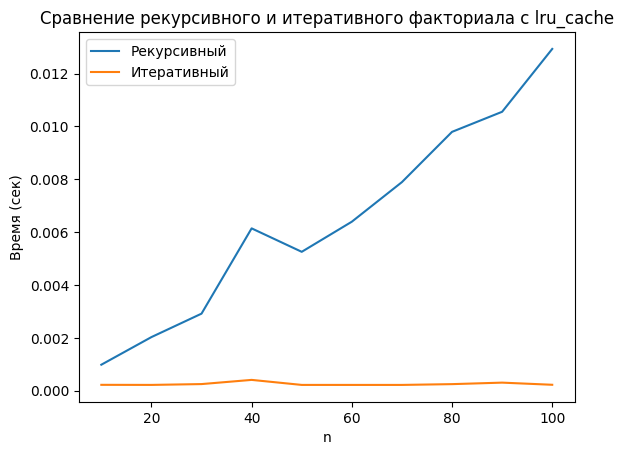

In [6]:
def main():
    # фиксированный набор данных
    test_data = list(range(10, 101, 10))

    res_iterative = []
    res_iterative_cache = []

    for n in test_data:
      res_iterative.append(benchmark(fact_iterative, n, repeat=5, number=1000))
      res_iterative_cache.append(benchmark(fact_iterative_cache, n, repeat=5, number=1000))

    print('n\tr\titer\titer w cache\tw/wo')
    for i in range(len(test_data)):
      print(test_data[i], '\t', '5', '\t', round(res_iterative[i], 6), '\t', round(res_iterative_cache[i], 6), '\t', round(res_iterative[i]/round(res_iterative_cache[i], 6)))

    # Визуализация
    plt.plot(test_data, res_iterative, label="Рекурсивный")
    plt.plot(test_data, res_iterative_cache, label="Итеративный")
    plt.xlabel("n")
    plt.ylabel("Время (сек)")
    plt.title("Сравнение рекурсивного и итеративного факториала с lru_cache")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()


**Сравнение рекурсивных функций** (с кешэм и без)

n	r	iter	iter w cache
10 	 5 	 0.001987 	 0.000266
20 	 5 	 0.004003 	 0.000265
30 	 5 	 0.006264 	 0.00026
40 	 5 	 0.007112 	 0.000224
50 	 5 	 0.009524 	 0.000265
60 	 5 	 0.011144 	 0.000218
70 	 5 	 0.0134 	 0.000266
80 	 5 	 0.016044 	 0.000249
90 	 5 	 0.018606 	 0.000305
100 	 5 	 0.020373 	 0.000218


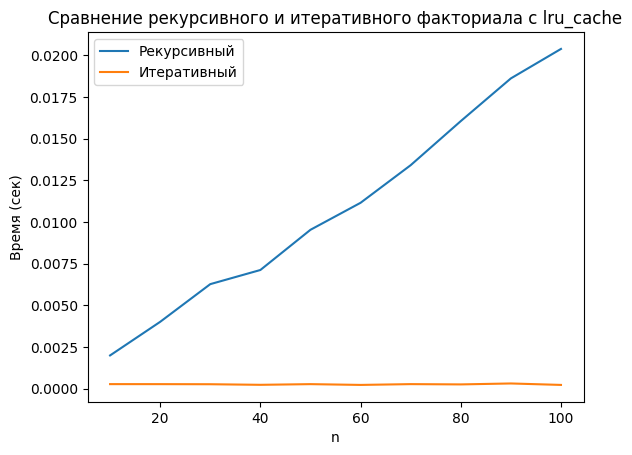

In [7]:
def main():
    # фиксированный набор данных
    test_data = list(range(10, 101, 10))

    res_recursive = []
    res_recursive_cache = []

    for n in test_data:
      res_recursive.append(benchmark(fact_recursive, n, repeat=5, number=1000))
      res_recursive_cache.append(benchmark(fact_recursive_cache, n, repeat=5, number=1000))

    print('n\tr\titer\titer w cache')
    for i in range(len(test_data)):
      print(test_data[i], '\t', '5', '\t', round(res_recursive[i], 6), '\t', round(res_recursive_cache[i], 6))

    # Визуализация
    plt.plot(test_data, res_recursive, label="Рекурсивный")
    plt.plot(test_data, res_recursive_cache, label="Итеративный")
    plt.xlabel("n")
    plt.ylabel("Время (сек)")
    plt.title("Сравнение рекурсивного и итеративного факториала с lru_cache")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()


# Анализ и выводы

Итеративные и рекурентные функции без кэша сравнивались между собой на массивах мощностью от 10 до 1000 с шагом 50. Кэшированные функции (как рекурентные, так и итеративные) сравнивались между собой на массивах мощностью от 200 до 10000 с шагом 200.

### Результаты тестов:
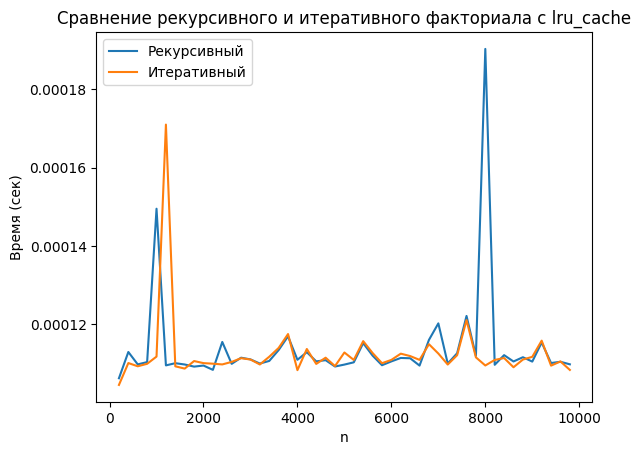

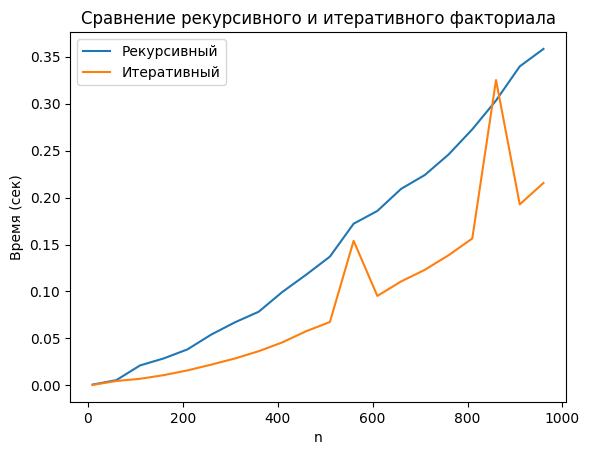

Примечание:
На графиках видны некоторые нетипичные значения измерений, их я принимаю за выбросы, при анализе просто игнорирую.


### По итогам измерений можно сделать следующие выводы:


*   Общая скорость работы функций с мемоизацией на порядок ниже, чем без мемоизации. В данном примере при n = 600 итеративная функция с кэшем работает примерно в 900 раз быстрее, а рекурсивная в 1600 раз. При увеличении n разница только увеличивается.
*   Итеративная функция без кэша работает быстрее, чем рекурсивная. При увеличении n оба время выполнения растут, но итеративная, как правило, остается более эффективной.
*   Рекурсивные функции работают с примерной одинаковой эффективностью, разница между ними не значимая (при разных n итеративная может быть эффективнее рекурсивной и наоборот). На интервале n от 200 до 10000 время выполнения функции в среднем не растет.


Таким образом, резюмируя, можно сказать, что без мемоизации разница в функциях заметна (итеративная эффективнее), с мемоизацией функции работают практически идентично, заметно эффективнее, чем без неё.

